

**MODELOS DE REGRESION MUESTRA BALANCEADA**

**Desarrollado por:** Diego Alejandro Salazar Blandon

**Especialización en Analítica y Ciencia de Datos**

**Facultad de Ingeniería - Universidad de Antioquia**


**Predicción del bajo peso al nacer. Un estudio comparativo entre técnicas tradicionales de análisis y técnicas de Machine Learning.**

## 1. Librerias y configuraciones previas

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import MinMaxScaler

from scipy.stats import spearmanr

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA # Análisis de Componentes Principales
from sklearn.decomposition import KernelPCA # Kernel PCA
from sklearn.decomposition import SparsePCA # PCA esparcido
from sklearn.decomposition import MiniBatchSparsePCA # Mini Batch PCA esparcido
from sklearn.utils.extmath import safe_sparse_dot # Producto punto entre matrices esparcidos para SparsePCA.
from sklearn.decomposition import IncrementalPCA # PCA incremental
from sklearn.decomposition import FastICA # Análisis de Componentes Independientes
from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection, SparseRandomProjection
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE # TSNE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
#import dmba as dm

from scipy.optimize import minimize # Librería que se utiliza para resolver el modelo de optimización. En este caso, se utiliza
                                    # la clase minimize para resolver el problema por minimización.
import random # para generar datos aleatorios de forma uniforme

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo
from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
                                                     # una métrica de varianza explicada
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
                                                # una métrica de error promedio absoluto
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance # 0.001 (Sensibilidad del modelo regresión)

from sklearn.linear_model import LinearRegression # Algoritmo para crear el modelo de regresión lineal múltiple
from sklearn.preprocessing import PolynomialFeatures # Características Polinomiales
from sklearn.linear_model import RANSACRegressor # Se llama a una clase llamada RANSACRegressor para aplicar el método
                                                 # RANSAC o random sample consensus
from scipy.stats import linregress
from sklearn.feature_selection import r_regression # Selección de características para regresión basado en el coeficiente de correlación de Pearson
from sklearn.feature_selection import SelectKBest # Seleccionar las mejores características
from sklearn.feature_selection import mutual_info_regression # Selección de características para regresión basado en información mutua
from sklearn.utils.validation import column_or_1d

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo
from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
                                                     # una métrica de varianza explicada
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
                                                # una métrica de error promedio absoluto
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance # 0.001 (Sensibilidad del modelo regresión)
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV # Búsqueda de cuadrículas
from sklearn.preprocessing import PolynomialFeatures # Características Polinomiales

from sklearn.ensemble import VotingRegressor # Voto Mayoritario para Regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

## 2. Funciones

In [2]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe
# cols     : lista de columnas a graficar
# num_cols : número de columnas
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe.
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):

    plt.rcParams['figure.figsize'] = figsize
    import math
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [3]:
# Función para contruir un modelo de regresión lineal por medio de statsmodels.api

def build_model(X,y):

    #A los datos de entrada 'X' se le adiciona una constante
    X = sm.add_constant(X)

    #Se crea y se entrena el modelo de regresion lineal q(statsmodels.api) con
    #los datos de entrada 'X' y los datos de salida 'y'
    lm = sm.OLS(y,X).fit()

    #imprime el resumen del modelo creado
    print(lm.summary()) # model summary

    return X

## 3. Descripción de la base de datos

**Name:** Natalidad

**Website:** http://medata.gov.co/dataset/nacimientos

**Description:**





**Output variable:**
1. Peso recien nacido

## 4. Exploración de Datos

In [4]:
d = pd.read_csv('./Nacimientobalanceadoregresion.csv')


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32110 entries, 0 to 32109
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AREANAC     32110 non-null  object 
 1   SIT_PARTO   32110 non-null  object 
 2   SEXO        32110 non-null  object 
 3   PESO_NAC    32110 non-null  float64
 4   MES         32110 non-null  float64
 5   ATEN_PAR    32110 non-null  object 
 6   T_GES       32110 non-null  float64
 7   NUMCONSUL   32110 non-null  float64
 8   TIPO_PARTO  32110 non-null  object 
 9   MUL_PARTO   32110 non-null  object 
 10  IDHEMOCLAS  32110 non-null  object 
 11  IDFACTORRH  32110 non-null  object 
 12  EDAD_MADRE  32110 non-null  float64
 13  EST_CIVM    32110 non-null  object 
 14  NIV_EDUM    32110 non-null  object 
 15  N_HIJOSV    32110 non-null  float64
 16  N_EMB       32110 non-null  float64
 17  SEG_SOCIAL  32110 non-null  object 
 18  EDAD_PADRE  32110 non-null  float64
 19  NIV_EDUP    32110 non-nul

In [6]:
d.head()

,AREANAC,SIT_PARTO,SEXO,PESO_NAC,MES,ATEN_PAR,T_GES,NUMCONSUL,TIPO_PARTO,MUL_PARTO,...,IDFACTORRH,EDAD_MADRE,EST_CIVM,NIV_EDUM,N_HIJOSV,N_EMB,SEG_SOCIAL,EDAD_PADRE,NIV_EDUP,COMUNA_RES
0,Cabecera municipal,Institución de salud,Masculino,4100.0,2.0,Medico,39.0,8.0,Espontáneo,simple,...,Positivo,27.0,Casada,Media academica,1.0,1.0,Excepción,29.0,Media academica,04 Aranjuez
1,Cabecera municipal,Institución de salud,Masculino,3195.0,4.0,Medico,38.0,8.0,Espontáneo,simple,...,Positivo,23.0,No casada y pareja < 2años,Media academica,2.0,2.0,contributivo,22.0,Media academica,02 Santa Cruz
2,Cabecera municipal,Institución de salud,Femenino,3090.0,6.0,Medico,39.0,8.0,Espontáneo,simple,...,Positivo,21.0,Soltera,Media academica,1.0,1.0,contributivo,21.0,Media academica,09 Buenos Aires
3,Cabecera municipal,Institución de salud,Masculino,3860.0,4.0,Medico,40.0,7.0,Cesária,simple,...,Positivo,34.0,No casada y pareja < 2años,Media academica,2.0,2.0,Subsidiado,31.0,Secundaria,05 Castilla
4,Cabecera municipal,Institución de salud,Femenino,3270.0,12.0,Medico,40.0,10.0,Espontáneo,simple,...,Positivo,19.0,Soltera,Secundaria,2.0,2.0,Subsidiado,21.0,Secundaria,13 San Javier


## 6. Visualización de datos

### Variables de entrada

En las variables de entrada para su mejor visualización y tratamiento se separan en dos grupos según su naturaleza cualitativa o cuantitativa.

In [7]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head()

,AREANAC,SIT_PARTO,SEXO,ATEN_PAR,TIPO_PARTO,MUL_PARTO,IDHEMOCLAS,IDFACTORRH,EST_CIVM,NIV_EDUM,SEG_SOCIAL,NIV_EDUP,COMUNA_RES
0,Cabecera municipal,Institución de salud,Masculino,Medico,Espontáneo,simple,A,Positivo,Casada,Media academica,Excepción,Media academica,04 Aranjuez
1,Cabecera municipal,Institución de salud,Masculino,Medico,Espontáneo,simple,A,Positivo,No casada y pareja < 2años,Media academica,contributivo,Media academica,02 Santa Cruz
2,Cabecera municipal,Institución de salud,Femenino,Medico,Espontáneo,simple,O,Positivo,Soltera,Media academica,contributivo,Media academica,09 Buenos Aires
3,Cabecera municipal,Institución de salud,Masculino,Medico,Cesária,simple,O,Positivo,No casada y pareja < 2años,Media academica,Subsidiado,Secundaria,05 Castilla
4,Cabecera municipal,Institución de salud,Femenino,Medico,Espontáneo,simple,A,Positivo,Soltera,Secundaria,Subsidiado,Secundaria,13 San Javier


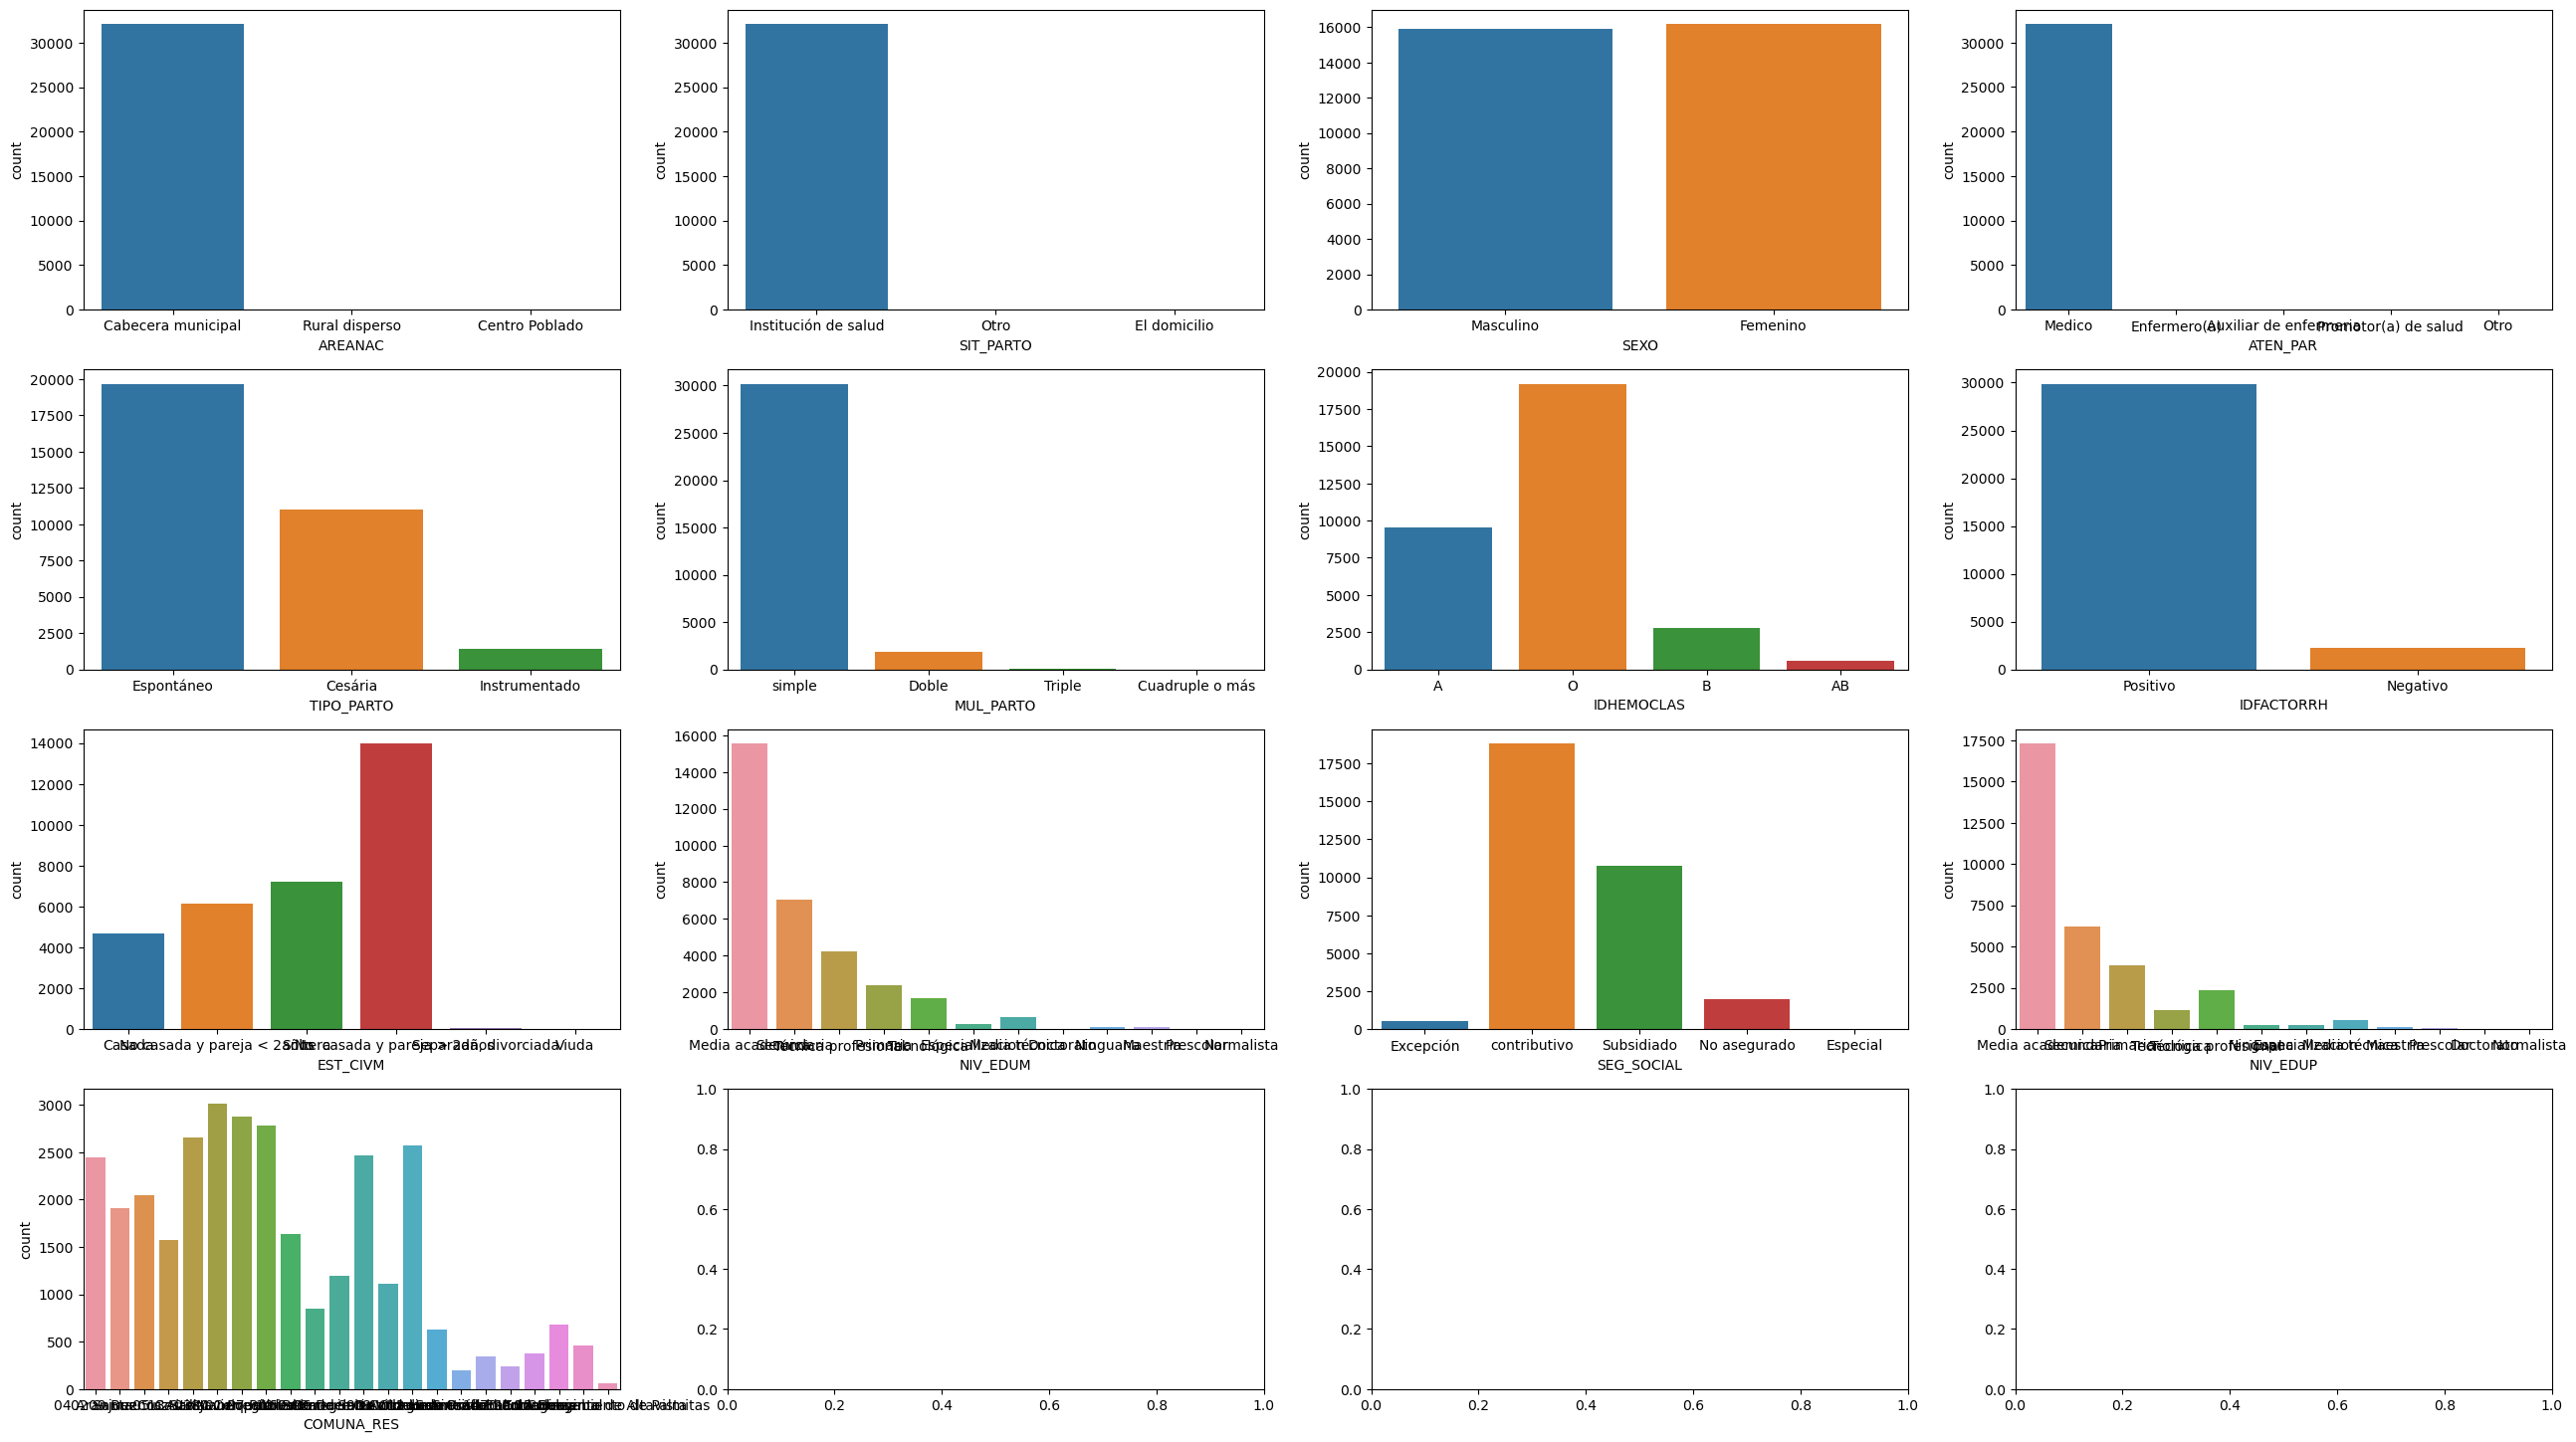

In [8]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(d,catCols, 4,4, 'c', None, (32,18))

In [9]:
for col in d[catCols].columns:
    print("="*5 + f" {col} " + "="*20)
    print(d[catCols][col].value_counts())
    print()

===== AREANAC ====================
Cabecera municipal    32101
Rural disperso            6
Centro Poblado            3
Name: AREANAC, dtype: int64

===== SIT_PARTO ====================
Institución de salud    32097
Otro                        7
El domicilio                6
Name: SIT_PARTO, dtype: int64

===== SEXO ====================
Femenino     16181
Masculino    15929
Name: SEXO, dtype: int64

===== ATEN_PAR ====================
Medico                    32088
Enfermero(a)                 13
Auxiliar de enfermeria        7
Promotor(a) de salud          1
Otro                          1
Name: ATEN_PAR, dtype: int64

===== TIPO_PARTO ====================
Espontáneo       19677
Cesária          11003
Instrumentado     1430
Name: TIPO_PARTO, dtype: int64

===== MUL_PARTO ====================
simple             30193
Doble               1879
Triple                34
Cuadruple o más        4
Name: MUL_PARTO, dtype: int64

===== IDHEMOCLAS ====================
O     19197
A      9558
B  

In [10]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
d[numCols].head()

,PESO_NAC,MES,T_GES,NUMCONSUL,EDAD_MADRE,N_HIJOSV,N_EMB,EDAD_PADRE
0,4100.0,2.0,39.0,8.0,27.0,1.0,1.0,29.0
1,3195.0,4.0,38.0,8.0,23.0,2.0,2.0,22.0
2,3090.0,6.0,39.0,8.0,21.0,1.0,1.0,21.0
3,3860.0,4.0,40.0,7.0,34.0,2.0,2.0,31.0
4,3270.0,12.0,40.0,10.0,19.0,2.0,2.0,21.0


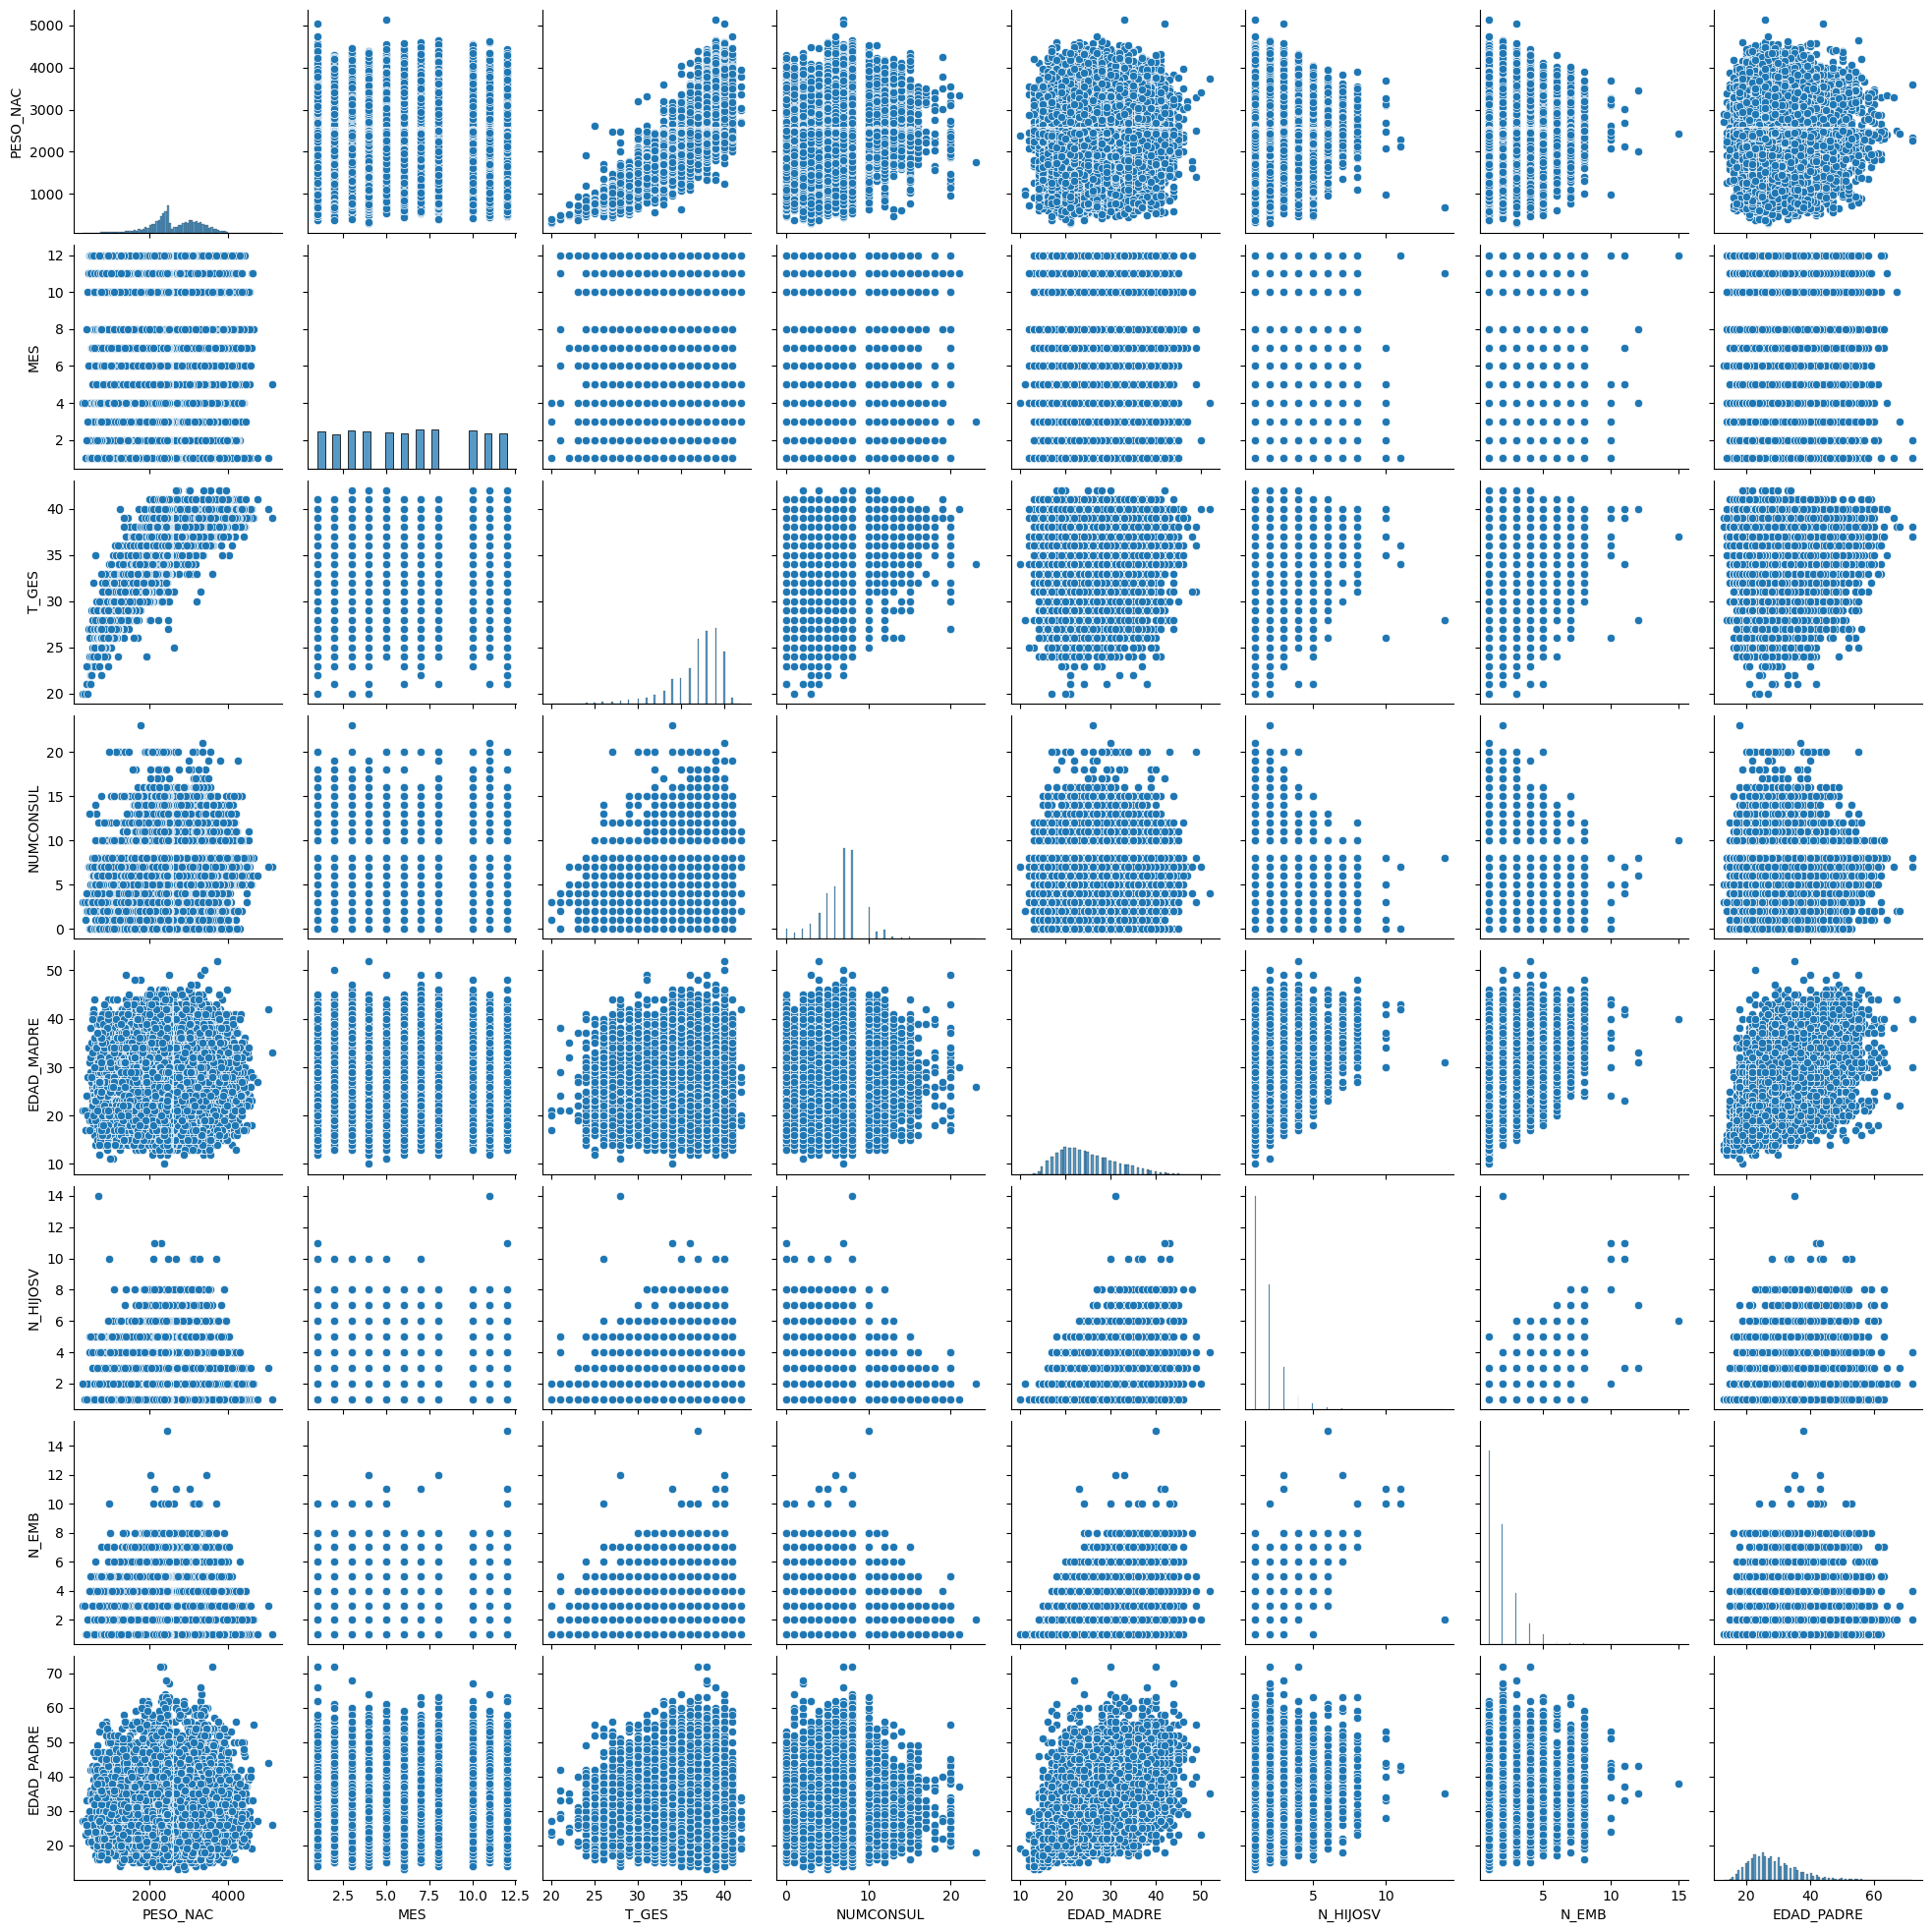

In [11]:
sns.pairplot(d[numCols])
plt.show()

### Variable de salida

C:\Users\57311\AppData\Local\Temp\ipykernel_16144\3022650701.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['PESO_NAC'])


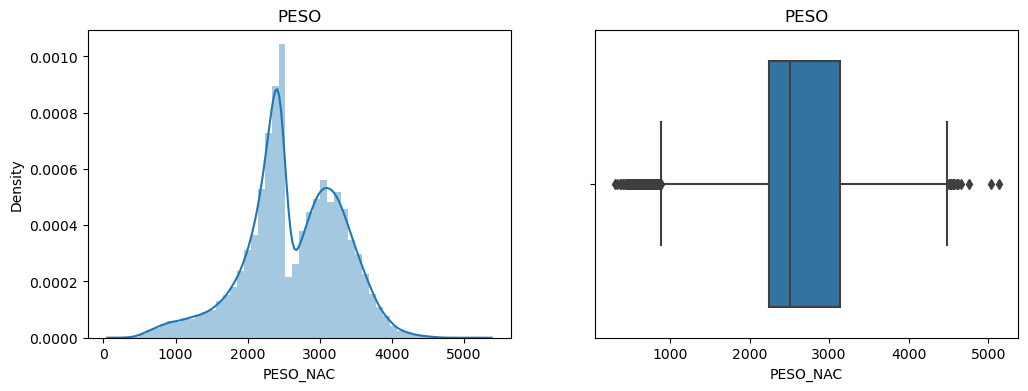

In [12]:
#Histográma y caja de bigotes del peso de los bebes

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('PESO')
sns.distplot(d['PESO_NAC'])

plt.subplot(1,2,2)
plt.title('PESO')
sns.boxplot(x=d['PESO_NAC'])

plt.show()

In [13]:
#Descripción de peso de los bebes: Total, media, desviación, mínimo, máximo y percentiles

#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#Descripción
print(d['PESO_NAC'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count   32110
mean     2628
std       672
min       305
25%      2240
50%      2502
75%      3140
85%      3340
90%      3470
95%      3650
97.5%    3800
100%     5130
max      5130
Name: PESO_NAC, dtype: float64


### 7. Preparación de datos

### Imputaciones

In [14]:
#Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

PESO_NAC 0
MES 0
T_GES 0
NUMCONSUL 0
EDAD_MADRE 0
N_HIJOSV 0
N_EMB 0
EDAD_PADRE 0


In [15]:
#verificación de la imputación: No existen valores nulos
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

AREANAC 0
SIT_PARTO 0
SEXO 0
PESO_NAC 0
MES 0
ATEN_PAR 0
T_GES 0
NUMCONSUL 0
TIPO_PARTO 0
MUL_PARTO 0
IDHEMOCLAS 0
IDFACTORRH 0
EDAD_MADRE 0
EST_CIVM 0
NIV_EDUM 0
N_HIJOSV 0
N_EMB 0
SEG_SOCIAL 0
EDAD_PADRE 0
NIV_EDUP 0
COMUNA_RES 0


### Valores atípicos para las variables de entrada

In [16]:
#utilización de LocalOutlierFactor con 14 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=14
#lof = LocalOutlierFactor(n_neighbors=14, contamination=0.1)

# identificar los valires atípicos por medio de lof
#y_pred = lof.fit_predict(d[numCols])

# Identificar los índices de los valores atípicos
#outliers = y_pred == -1

#print('Indices de valores atípicos: ', d[outliers].index.tolist())


In [17]:
# Eliminar los valores atípicos del dataframe original
#d = d.loc[~outliers]

### Creación de Variables Dummies

In [18]:
# Aplicación de la función de get_dummies

df =pd.get_dummies(d, drop_first=1)

### Dividir el conjunto de datos

In [19]:
#Se crea una lista con todas las varibles de entrada

vDep = list(df.columns)
vDep.remove('PESO_NAC')

print(vDep)

['MES', 'T_GES', 'NUMCONSUL', 'EDAD_MADRE', 'N_HIJOSV', 'N_EMB', 'EDAD_PADRE', 'AREANAC_Centro Poblado', 'AREANAC_Rural disperso', 'SIT_PARTO_Institución de salud', 'SIT_PARTO_Otro', 'SEXO_Masculino', 'ATEN_PAR_Enfermero(a)', 'ATEN_PAR_Medico', 'ATEN_PAR_Otro', 'ATEN_PAR_Promotor(a) de salud', 'TIPO_PARTO_Espontáneo', 'TIPO_PARTO_Instrumentado', 'MUL_PARTO_Doble', 'MUL_PARTO_Triple', 'MUL_PARTO_simple', 'IDHEMOCLAS_AB', 'IDHEMOCLAS_B', 'IDHEMOCLAS_O', 'IDFACTORRH_Positivo', 'EST_CIVM_No  casada y pareja > 2años ', 'EST_CIVM_No casada y pareja < 2años', 'EST_CIVM_Separada, divorciada', 'EST_CIVM_Soltera', 'EST_CIVM_Viuda', 'NIV_EDUM_Especializacion', 'NIV_EDUM_Maestria', 'NIV_EDUM_Media academica', 'NIV_EDUM_Media técnica', 'NIV_EDUM_Ninguana', 'NIV_EDUM_Normalista', 'NIV_EDUM_Prescolar', 'NIV_EDUM_Primaria', 'NIV_EDUM_Secundaria', 'NIV_EDUM_Tecnológica', 'NIV_EDUM_Técnica profesional', 'SEG_SOCIAL_Excepción', 'SEG_SOCIAL_No asegurado', 'SEG_SOCIAL_Subsidiado', 'SEG_SOCIAL_contributivo'

In [20]:
#Se elimina el elemento Peso de la lista de variables numéricas

numCols.remove('PESO_NAC')

In [21]:
# División de los datos en train y test


# Se establecen los dataframes de con las variables de entrada X y la variable de salida y
X = df[vDep]
y = df['PESO_NAC']

In [22]:
#Escalar Variables

# Se establece la configuración para que los valores numéricos se vean con 4 decimales
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()
# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X[numCols] = scaler.fit_transform(X[numCols])
X.head()

C:\Users\57311\AppData\Local\Temp\ipykernel_16144\2007919875.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numCols] = scaler.fit_transform(X[numCols])


,MES,T_GES,NUMCONSUL,EDAD_MADRE,N_HIJOSV,N_EMB,EDAD_PADRE,AREANAC_Centro Poblado,AREANAC_Rural disperso,SIT_PARTO_Institución de salud,...,COMUNA_RES_13 San Javier,COMUNA_RES_14 El Poblado,COMUNA_RES_15 Guayabal,COMUNA_RES_16 Belen,COMUNA_RES_50 Corregimiento de Palmitas,COMUNA_RES_60 Corregimiento de San Cristobal,COMUNA_RES_70 Corregimiento de Altavista,COMUNA_RES_80 Corregimiento de San Antonio de Prado,COMUNA_RES_90 Corregimiento de Santa Elena,COMUNA_RES_Sin informacion
0,0.0909,0.8636,0.3478,0.4048,0.0000,0.0000,0.2712,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.2727,0.8182,0.3478,0.3095,0.0769,0.0714,0.1525,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.4545,0.8636,0.3478,0.2619,0.0000,0.0000,0.1356,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.2727,0.9091,0.3043,0.5714,0.0769,0.0714,0.3051,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0000,0.9091,0.4348,0.2143,0.0769,0.0714,0.1356,0,0,1,...,1,0,0,0,0,0,0,0,0,0


## Reducción de dimensionalidad

Una vez realizado la exploración de datos del item anterior, se procede a transformar los datos originales en datos reducidos o embebidos a partir de los algoritmo de reducción de dimensionalidad. Se sugiere utilizar mínimo tres métodos de reducción de dimensionalidad para seleccionar los datos reducidos con el error cuadrático medio más bajo.

### Análisis de Componentes Principales (PCA)

In [23]:
Num_Componentes = X.shape[1] # estamos trabajando con el numero de componentes igual al numero de

pca = PCA(iterated_power='auto', n_components = Num_Componentes, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

# El número de componentes debe ser menor o igual al número de características de los datos.

# Calcular los valores de las componentes principales iterated_power es el número de iteraciones para el método computacional de PCA. 
# Usualmente, es aleatorio el número de iteraciones.
# n_components es el número de componentes principales
# random_state es la semilla de un número aleatorio. Si random_state = 'None', significa que el generador de números
# aleatorios es una muestra de un estado aleatorio usado por np.random. Si random_state = 'Int', entonces el estado aleatorio
# es la semilla usado por el generador de números aleatorios. Sugiero usar la primera opción.
# svd_solver es el método de solución de PCA. Por defecto, se usa svd_solver = "auto" pero pueden seleccionar "full",
# "arpack" o "randomized". Para más opciones de PCA, recomiendo visitar la siguiente url: 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.

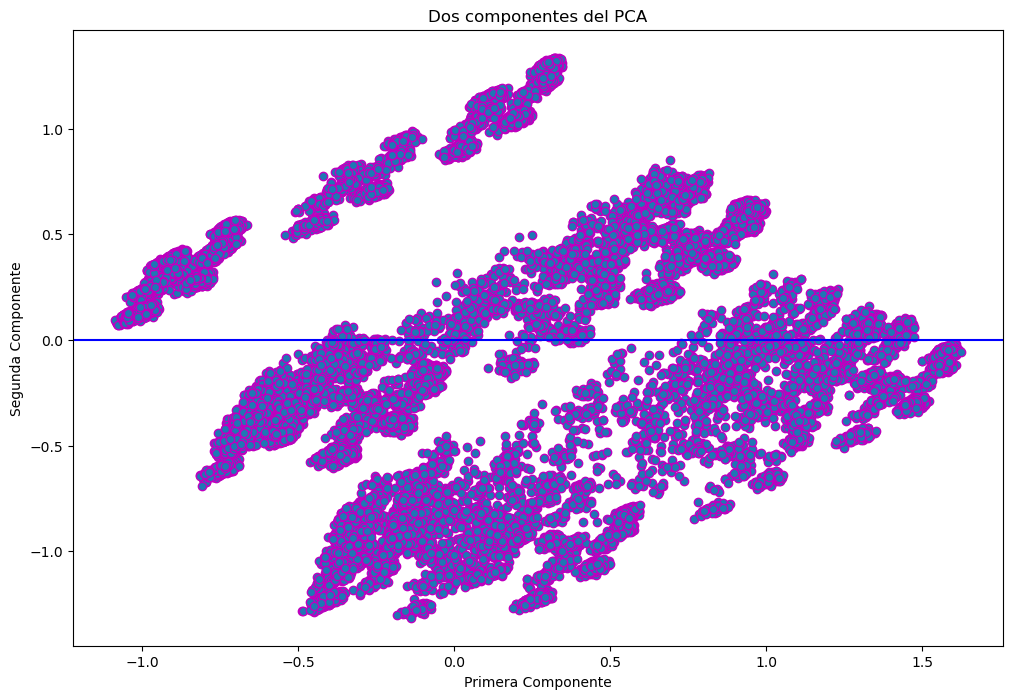

In [24]:
Variables_Principales = pca.fit_transform(X) 
# Transformarmos las componentes principales a partir de los datos

fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(Variables_Principales[:,0], Variables_Principales[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del PCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.show() # Mostrar figura

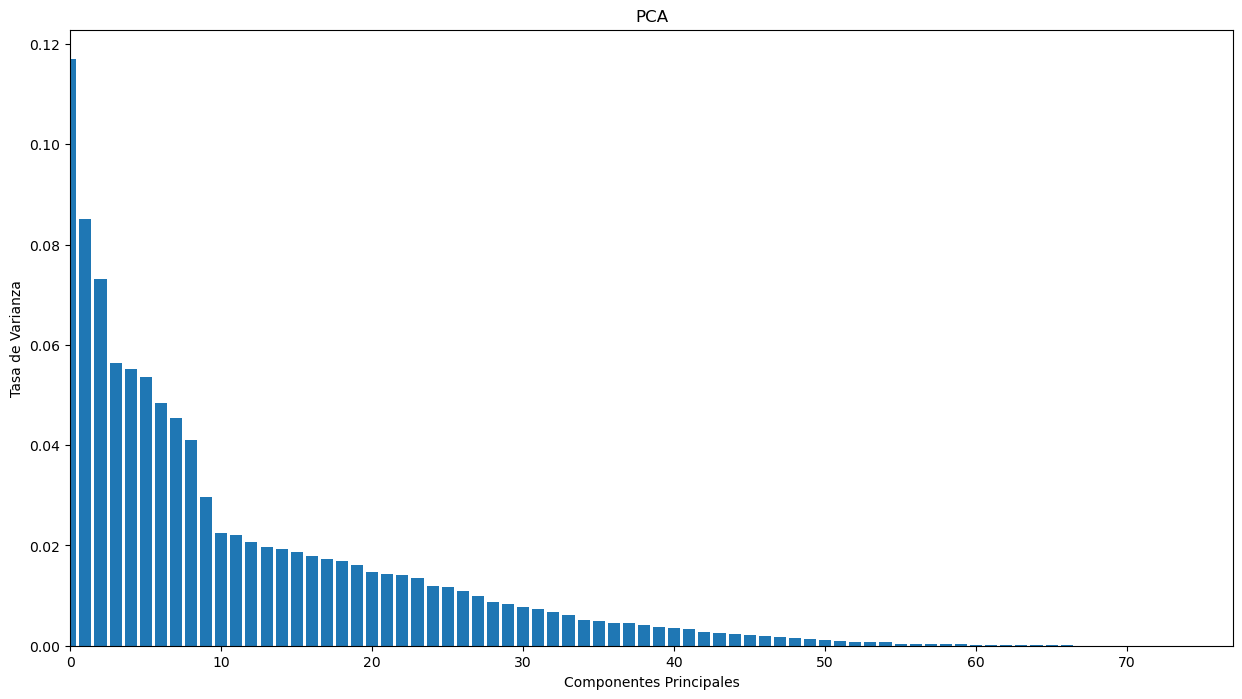

In [25]:
Varianza = pca.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales

fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(len(Varianza)), Varianza)
plt.xlabel('Componentes Principales')
plt.ylabel('Tasa de Varianza')
plt.title('PCA')
plt.xlim(0, len(Varianza))
plt.show()

In [26]:
Importancia_Componentes = pd.DataFrame(Varianza)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 1 componentes: ", format(100*Importancia_Componentes.loc[:,0:0].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 2 componentes: ", format(100*Importancia_Componentes.loc[:,0:1].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 4 componentes: ", format(100*Importancia_Componentes.loc[:,0:3].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 5 componentes: ", format(100*Importancia_Componentes.loc[:,0:4].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 8 componentes: ", format(100*Importancia_Componentes.loc[:,0:7].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 15 componentes: ", format(100*Importancia_Componentes.loc[:,0:14].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 20 componentes: ", format(100*Importancia_Componentes.loc[:,0:19].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 30 componentes: ", format(100*Importancia_Componentes.loc[:,0:29].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 40 componentes: ", format(100*Importancia_Componentes.loc[:,0:39].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 1 componentes:  [11.69801503]
Porcentaje de Varianza detectada para las primeras 2 componentes:  [20.19816175]
Porcentaje de Varianza detectada para las primeras 3 componentes:  [27.51983243]
Porcentaje de Varianza detectada para las primeras 4 componentes:  [33.16515532]
Porcentaje de Varianza detectada para las primeras 5 componentes:  [38.67779555]
Porcentaje de Varianza detectada para las primeras 8 componentes:  [53.42549308]
Porcentaje de Varianza detectada para las primeras 10 componentes:  [60.48726637]
Porcentaje de Varianza detectada para las primeras 15 componentes:  [70.90182084]
Porcentaje de Varianza detectada para las primeras 20 componentes:  [79.59431847]
Porcentaje de Varianza detectada para las primeras 30 componentes:  [91.42163967]
Porcentaje de Varianza detectada para las primeras 40 componentes:  [96.91326329]


In [27]:
Componentes_Seleccionadas = 40
# Recuerde que se toma 0 como la primera componente principal.
# [0:6] es lo mismo que [0, 1, 2, 3, 4, 5, 6], donde 0 es la primera componente, 
# 1 es la segunda componente, 2 es la tercera componente, etc...

Tasa_Varianza_Explicada = np.sum(Varianza[0:Componentes_Seleccionadas])
pca = PCA(Tasa_Varianza_Explicada, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

X_PCA = pca.fit_transform(X) 

print('Tamaño de los datos originales con MinMax: ', X.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', X_PCA.shape)  # Tamaño de los datos reducidos
print("Porcentaje de la varianza explicada con las componentes seleccionadas: {:.2f}%".format(Tasa_Varianza_Explicada*100))

Tamaño de los datos originales con MinMax:  (32110, 77)
Tamaño de los datos reducidos:  (32110, 40)
Porcentaje de la varianza explicada con las componentes seleccionadas: 96.91%


In [28]:
def error_cm(datos_OR, datos_Reconstruidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reconstruidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

In [29]:
Datos_inversa_PCA = pca.inverse_transform(X_PCA) 
# Generamos la transformada inversa del KPCA para obtener los datos reconstruidos
print('Tamaño de los datos con transformada inversa: ', Datos_inversa_PCA.shape)

Tamaño de los datos con transformada inversa:  (32110, 77)


In [30]:
X_Norm_DF = pd.DataFrame(data = np.array(X))
Datos_inversa_DF = pd.DataFrame(data = np.array(Datos_inversa_PCA))
Error = error_cm(X_Norm_DF, Datos_inversa_DF)

print('Error promedio: {:.5f}'.format(np.mean(Error)))

Error promedio: 0.03267


In [31]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X_PCA,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

## 7. Creación de un Modelo de Regresion Tradicional

In [32]:
#Llamamos la funcion build_model definida al principio de este notebook que crea y entrena el modelo

modelo_X_train = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     701.5
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:56:30   Log-Likelihood:            -1.6915e+05
No. Observations:               22477   AIC:                         3.384e+05
Df Residuals:                   22436   BIC:                         3.387e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2627.6187      2.997    876.841      0.0

In [33]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

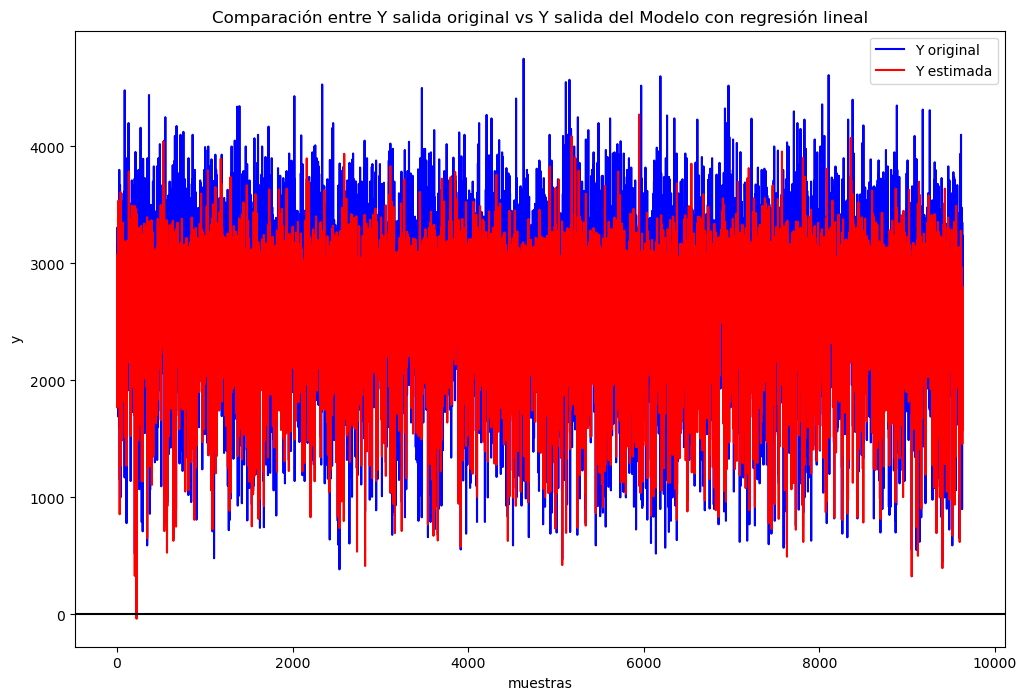

In [34]:
Y_pred = LR.predict(X_test) # Estima los valores de salida del modelo de regresión

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(y_test)), y_test,
                  color = 'b', label='Y original')
line_2 = plt.plot(np.arange(len(y_test)), Y_pred,
                  color = 'r', label='Y estimada')
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del Modelo con regresión lineal') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [35]:
Puntaje_1 = LR.score(X_test, y_test) # Validación por puntaje o score
Validacion = cross_val_score(LR, X_test,
                             y_test, cv = 5,
                             scoring = 'r2') #mejor estimacion del modelo de regresion lineal
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el r2
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.5497
Media = 0.5479
Desviación Estándar = 0.018341706923933


##  Árboles de Decisión Random Forest (Regresión)

##Librerias y configuraciones previas


In [36]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================

#creación de modelos
from sklearn.ensemble import RandomForestRegressor


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#import statsmodels.api as sm
import math

#evaluacion de variables
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Creación del modelo

Un Random Forest es un metaestimador que ajusta una serie de árboles de decisión de clasificación en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

**Parametros:**
- **n_estimators:** (default=100) número de árboles del bosque
- **max_depth:** (default=None) La profundidad máxima del árbol. Si es `None`, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos ejemplos del parametro min_samples_split.
- **max_features:** (default=1.0) El número de características a considerar al buscar la mejor división
    - auto, None o 1.0: max_features=n_features.
    - sqrt: max_features=sqrt(n_features).
    - log2: max_features=log2(n_features).

- **bootstrap:**(default=True) Si se utilizan muestras al construir árboles. Si es False, se usa todo el conjunto de datos para construir cada árbol.

- **oob_score:** (default=False) si usa ejemplos out-of-bag para estimar un score de generalización. Solo disponible si bootstrap = True.

In [37]:
# Creación del modelo
# ==============================================================================
modeloAR = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'friedman_mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,   #out-of-bag samples
            n_jobs       = -1,
            random_state = 123
         )


# Entrenamiento del modelo
# ==============================================================================
modeloAR.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_features='auto',
                      n_estimators=10, n_jobs=-1, random_state=123)

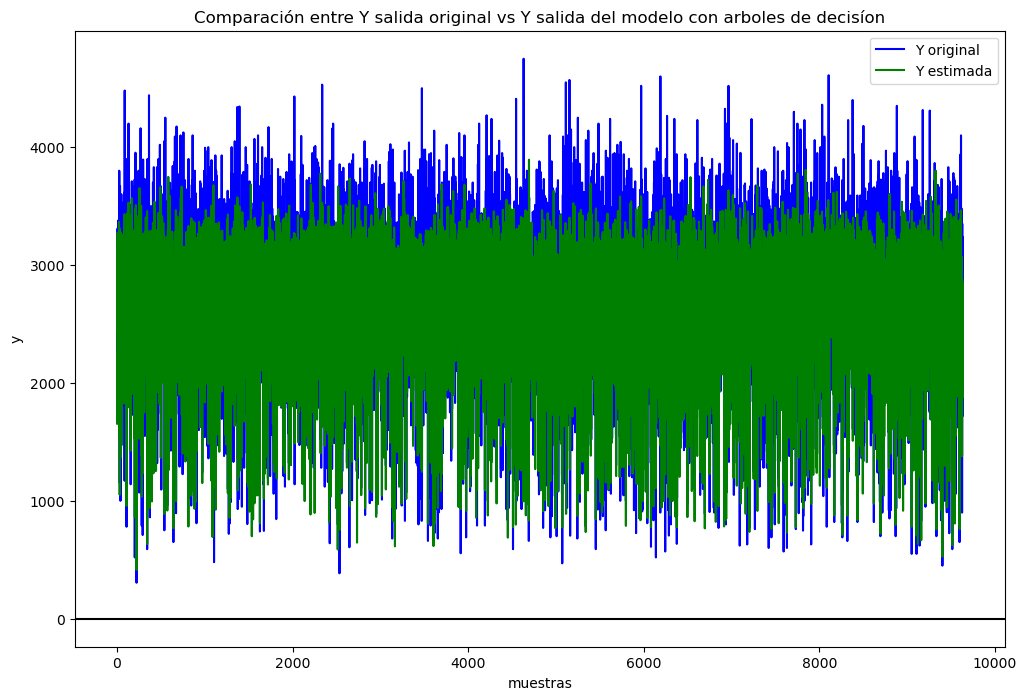

In [38]:
Y_predarboles = modeloAR.predict(X_test) # Estima los valores de salida del modelo de regresión

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(y_test)), y_test,
                  color = 'b', label='Y original')
line_2 = plt.plot(np.arange(len(y_test)), Y_predarboles,
                  color = 'g', label='Y estimada')
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con arboles de decisíon') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

### Evaluación del modelo

#### Error Cuadráico Medio (rmse) y el Coeficiente de Determinación $R^2$

In [39]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modeloAR.predict(X = X_test)

rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
print(f"El error (rmse) de test es: {rmse}")

r2 = r2_score(y_test, predicciones)
print(f"El error (r2) de test es: {r2}")

El error (rmse) de test es: 452.43267986357745
El error (r2) de test es: 0.5424787728577158


## Support Vector Machine (Regresión)

## 1. Librerias y configuraciones previas


In [40]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#Evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

#Creación de modelo
from sklearn.svm import SVR


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Creación del modelo

**Parámetros importantes**

- **C** (default = 1.0): Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C.Debe ser estrictamente positiva.La penalización es una penalización l2 al cuadrado. Un valor alto de C dará como resultado un modelo más complejo que se ajusta muy bien a los datos de entrenamiento pero puede tener problemas de sobreajuste (overfitting) en datos nuevos.

    
- **kernel** (default=’rbf’):
Especifica el tipo de kernel que se utilizará en el algoritmo. Debe ser ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ o invocable.


- **degreeint** (default=3)
Grado de la función del núcleo polinomial ('poly'). Ignorado por todos los demás núcleos.
   

- **gamma** {‘scale’, ‘auto’} or float, default=’scale’
Coeficiente de kernel para 'rbf', 'poli' y 'sigmoide'. ‘rbf’, ‘poly’ and ‘sigmoid’.

    - Si 'scale' usa 1 / (n_features * X.var())

    - Si ‘auto’ usa 1 / n_features.

- **epsilon** {default=0.1} controla el ancho de la zona de tolerancia alrededor de la línea de regresión. Los puntos que caen dentro de esta zona no son considerados errores de predicción.





In [41]:
SVMR_linear    = SVR(kernel='linear' , C = 1000)
SVMR_Pol2   = SVR(kernel='poly'   , C = 1000, degree = 2)
SVMR_Pol3   = SVR(kernel='poly'   , C = 1000, degree = 3)
SVMR_rbf   = SVR(kernel='rbf'    , C = 1000)
SVMR_sig   = SVR(kernel='sigmoid', C = 1000)
 
    
SVMR_linear.fit(X_train, y_train)  
SVMR_Pol2.fit(X_train, y_train)  
SVMR_Pol3.fit(X_train, y_train)  
SVMR_rbf.fit(X_train, y_train)   
SVMR_sig.fit(X_train, y_train)  
    

SVR(C=1000, kernel='sigmoid')

In [42]:
modelos = [LR.predict(X_test),modeloAR.predict(X_test),SVMR_linear.predict(X_test), SVMR_Pol2.predict(X_test), SVMR_Pol3.predict(X_test), SVMR_rbf.predict(X_test), SVMR_sig.predict(X_test)]
etiquetas_modelos = ['Regresión lineal', 'Arboles de Decisión','SVM Linear', 'SVM Polynomial (degree=2)', 'SVM Polynomial (degree=3)', 'SVM RBF', 'SVM Sigmoid']


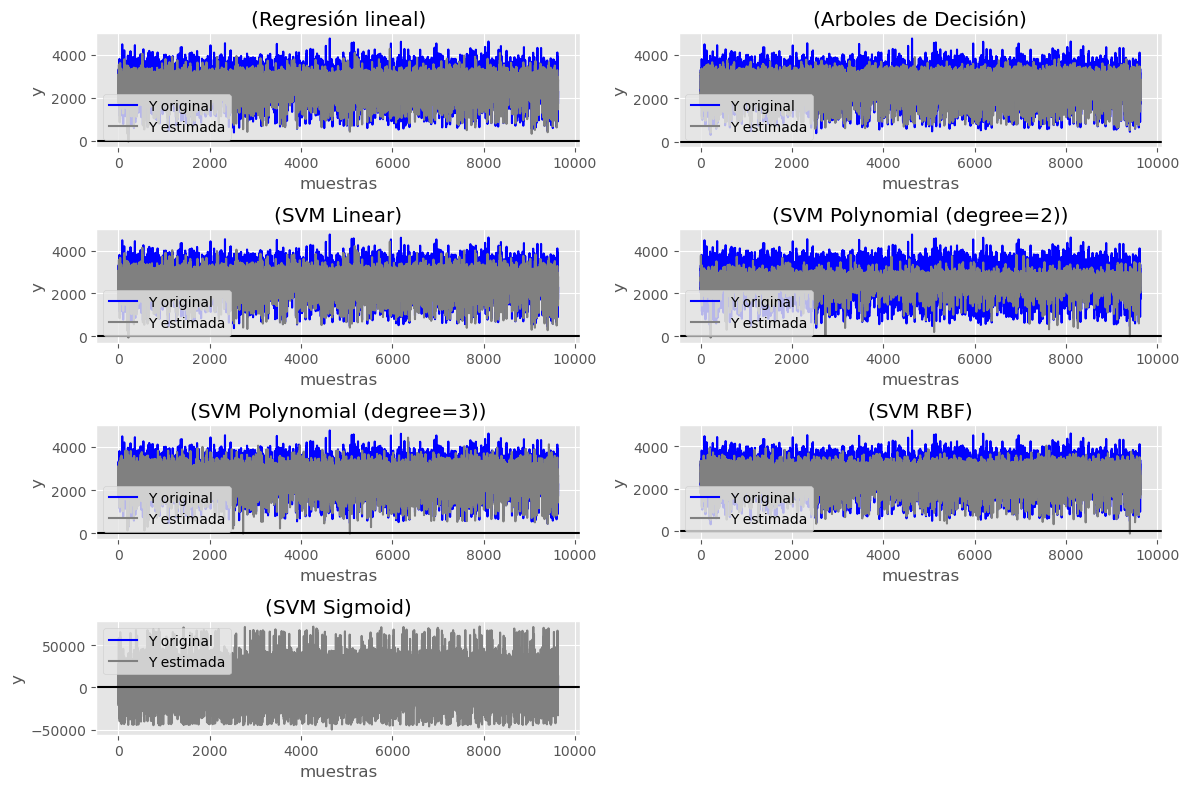

In [43]:
colores_prediccion = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
# Crear una matriz de subgráficos
num_modelos = len(modelos)
num_filas = int(np.ceil(num_modelos / 2))  # 2 columnas por fila
fig, axs = plt.subplots(num_filas, 2, figsize=(12, 2 * num_filas))

# Iterar sobre los modelos y generar gráficos
for i, (modelo, etiqueta, color_prediccion) in enumerate(zip(modelos, etiquetas_modelos, colores_prediccion)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
    ax.plot(np.arange(len(y_test)), y_test, color='b', label='Y original')
    ax.plot(np.arange(len(y_test)), modelo, color=color_prediccion, label='Y estimada')
    ax.axhline(0, color="black") 
    ax.legend()
    ax.set_title(f'({etiqueta})')
    ax.set_xlabel('muestras')
    ax.set_ylabel('y')

# Ajustar el diseño de la matriz de subgráficos
if num_modelos % 2 != 0:
    fig.delaxes(axs[-1, -1])  # Eliminar último subplot si hay un número impar de modelos

plt.tight_layout()
plt.show()

### Evaluación del modelo

In [44]:
print('Linear   Training: ', SVMR_linear.score(X_train,y_train), 'Test:',r2_score(y_test,SVMR_linear.predict(X_test)))
print('Poly 2   Training: ', SVMR_Pol2.score(X_train,y_train), 'Test:',r2_score(y_test,SVMR_Pol2.predict(X_test)))
print('Poly 3   Training: ', SVMR_Pol3.score(X_train,y_train), 'Test:',r2_score(y_test,SVMR_Pol3.predict(X_test)))
print('rbf      Training: ', SVMR_rbf.score(X_train,y_train), 'Test:',r2_score(y_test,SVMR_rbf.predict(X_test)))
print('sigmoide Training: ', SVMR_sig.score(X_train,y_train), 'Test:',y_test,SVMR_sig.predict(X_test))


Linear   Training:  0.5527545661605409 Test: 0.5461867643783577
Poly 2   Training:  0.2795964378773399 Test: 0.20565207077288894
Poly 3   Training:  0.6539490664551807 Test: 0.5123345841795093
rbf      Training:  0.6912912589531384 Test: 0.5630872747714435
sigmoide Training:  -1111.740166661724 Test: [[2240.]
 [2190.]
 [3160.]
 ...
 [1715.]
 [3240.]
 [2260.]] [-20467.71458615  22973.87724057  27623.88029711 ...  -7769.3501489
  -2000.10187846  13058.51189577]


In [48]:
print('Regresion  MAE: ', mean_absolute_error(y_test,LR.predict(X_test)), 'r2:',r2_score(y_test,LR.predict(X_test)))
print('Arboles   MAE: ', mean_absolute_error(y_test,modeloAR.predict(X_test)), 'r2:',r2_score(y_test,modeloAR.predict(X_test)))


Regresion  MAE:  356.7169367413737 r2: 0.5496500021990296
Arboles   MAE:  356.76795771479976 r2: 0.5424787728577158


In [49]:
print('Regresion  MAE: ', mean_absolute_error(y_test,LR.predict(X_test)), 'r2:',r2_score(y_test,LR.predict(X_test)))
print('Arboles   MAE: ', mean_absolute_error(y_test,modeloAR.predict(X_test)), 'r2:',r2_score(y_test,modeloAR.predict(X_test)))
print('Linear   MAE: ', mean_absolute_error(y_test,SVMR_linear.predict(X_test)), 'r2:',r2_score(y_test,SVMR_linear.predict(X_test)))
print('Poly 2   MAE: ', mean_absolute_error(y_test,SVMR_Pol2.predict(X_test)), 'r2:',r2_score(y_test,SVMR_Pol2.predict(X_test)))
print('Poly 3   MAE: ', mean_absolute_error(y_test,SVMR_Pol3.predict(X_test)), 'r2:',r2_score(y_test,SVMR_Pol3.predict(X_test)))
print('rbf      MAE: ', mean_absolute_error(y_test,SVMR_rbf.predict(X_test)), 'r2:',r2_score(y_test,SVMR_rbf.predict(X_test)))
print('sigmoide MAE: ', mean_absolute_error(y_test,SVMR_sig.predict(X_test)), 'r2:',r2_score(y_test,SVMR_sig.predict(X_test)))

Regresion  MAE:  356.7169367413737 r2: 0.5496500021990296
Arboles   MAE:  356.76795771479976 r2: 0.5424787728577158
Linear   MAE:  355.9931379219005 r2: 0.5461867643783577
Poly 2   MAE:  487.2687410934227 r2: 0.20565207077288894
Poly 3   MAE:  367.9256892859347 r2: 0.5123345841795093
rbf      MAE:  348.7576965165061 r2: 0.5630872747714435
sigmoide MAE:  18291.077222531356 r2: -1114.2703004586526


In [50]:


# Datos
datos = {
    'Método': ['Regresión', 'Árboles', 'Linear', 'Poly 2', 'Poly 3', 'RBF', 'Sigmoidal'],
    'R²': [r2_score(y_test,LR.predict(X_test)), r2_score(y_test,modeloAR.predict(X_test)), r2_score(y_test,SVMR_linear.predict(X_test)), r2_score(y_test,SVMR_Pol2.predict(X_test)), r2_score(y_test,SVMR_Pol3.predict(X_test)), r2_score(y_test,SVMR_rbf.predict(X_test)), r2_score(y_test,SVMR_sig.predict(X_test))],
    'MAE': [mean_absolute_error(y_test,LR.predict(X_test)), mean_absolute_error(y_test,modeloAR.predict(X_test)), mean_absolute_error(y_test,SVMR_linear.predict(X_test)), mean_absolute_error(y_test,SVMR_Pol2.predict(X_test)), mean_absolute_error(y_test,SVMR_Pol3.predict(X_test)), mean_absolute_error(y_test,SVMR_rbf.predict(X_test)), mean_absolute_error(y_test,SVMR_sig.predict(X_test))]
    
}

# Crear un DataFrame
df = pd.DataFrame(datos)
df


,Método,R²,MAE
0,Regresión,0.5497,356.7169
1,Árboles,0.5425,356.7680
2,Linear,0.5462,355.9931
3,Poly 2,0.2057,487.2687
4,Poly 3,0.5123,367.9257
5,RBF,0.5631,348.7577
6,Sigmoidal,-1114.2703,18291.0772


#### Referencias


- Random Forest
    - https://www.cienciadedatos.net/documentos/py08_random_forest_python.html
    - https://fhernanb.github.io/libro_mod_pred/rand-forests.html
    - https://scikit-learn.org/stable/modules/model_evaluation.html
